#### Problem to solve
+ date ranges-index the rows by dates
+ multiple stocks
+ align dates
+ proper date order
+ dates and the files we read them from are in reverse order

#### NYSE trading days
New York Stock Exchange has a set of holidays that occasionally differ from the US Government holidays.  
252 in 2014

#### Building a dataframe
If SPY was traded, it means the market was open.    
So we can set SPY as reference.  
Our df should only contain dates when SPY actually traded

#### Create an empty data frame

In [29]:
import pandas as pd

#define date range
start_date="2010-01-22"
end_date='2010-01-26'
dates=pd.date_range(start_date,end_date)
print dates
print dates[0]# date time index object

#create an empty dataframe
print ''
df1=pd.DataFrame(index=dates)
print df1

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')
2010-01-22 00:00:00

Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


In [30]:
#read spy data into temporary dataframe
#make sure you give the correct index column name
#we also wanna dates presented in the dataframe to be converted into date time index objects
print ''
dfSPY=pd.read_csv("data/SPY.csv",
                  index_col='Date',
                  parse_dates=True,
                  usecols=['Date','Adj Close'],   #git rid of other col
                  na_values=['nan'])#csv-NaN as strings, so we need to tell that NaN should not be interpreted as a number
#We just wanna the date on which SPY traded, so we can add more stocks based o these dates.

#rename 'Adj Close' column to 'SPY' to prevent clash
dfSPY=dfSPY.rename(columns={'Adj Close':'SPY'})
print dfSPY.head(n=2)



                   SPY
Date                  
2017-03-29  235.539993
2017-03-28  235.320007


In [41]:
import os
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)# 1create empty df for designated date
    
    if 'SPY' not in symbols:  # 2add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol, base_dir="data"), # 3read in data from the symbol
                           index_col='Date',
                           parse_dates=True,
                           usecols=['Date','Adj Close'],
                           na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})       # 4rename the adjust close column to the symbol name
        df=df.join(df_temp) 
        if symbol =='SPY':#5drop rows where SPY is na/ensure SPY is used as a reference-we don't have na values in the spy column
            df=df.dropna(subset=['SPY'])
    return df

In [42]:
symbol_to_path('XOM')

'data/XOM.csv'

### Join SPY data
a.join(b)   
It will read in all the rules from a, but only those rules from b whose index values are present in a's index.


For the remaining rows, that's the index values not in b, pandas introduce nans.

In this case, all the rules from df1 will be retained.  
We will get all the values for the prices from dfSPY for the given range we defined above.    
This will give us all the prices for the stock SPY in the defined date ranges.   

### Types of "join"
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html  
The above 2 steps can be done in a single step using **how** argument.
+ join
+ drop nan

In [31]:
#Join the two dataframes using DataFrame.join()
#23,24 are weekends
df1=df1.join(dfSPY)
print df1

                  SPY
2010-01-22  94.233925
2010-01-23        NaN
2010-01-24        NaN
2010-01-25  94.717130
2010-01-26  94.320211


In [32]:
# Drop rows which have NaN values
df1=df1.dropna()
print df1

                  SPY
2010-01-22  94.233925
2010-01-25  94.717130
2010-01-26  94.320211


In [25]:
df1=df1.join(dfSPY,how="inner")
print df1

ValueError: columns overlap but no suffix specified: Index([u'SPY'], dtype='object')

### read in more stocks
write a for loop to join each stock into dataframe

In [33]:
symbols=['GOOG','IBM','GLD']
for symbol in symbols:
    df_temp=pd.read_csv('data/{}.csv'.format(symbol),
                       index_col='Date',
                       parse_dates=True,
                       usecols=['Date','Adj Close'],
                       na_values=['nan'])    
    df_temp=df_temp.rename(columns={'Adj Close':symbol})
    df1=df1.join(df_temp)#use default how='left'
    
#column names must be unique, however, the colume we are extracting each time is names Adj Close
#We would like each stock symbol as the corresponding column name
print df1

                  SPY        GOOG  IBM         GLD
2010-01-22  94.233925  274.730736  NaN  107.169998
2010-01-25  94.717130  269.730740  NaN  107.480003
2010-01-26  94.320211  270.939526  NaN  107.559998


In [43]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    print df

test_run()

                  SPY        GOOG  IBM         GLD
2010-01-22  94.233925  274.730736  NaN  107.169998
2010-01-25  94.717130  269.730740  NaN  107.480003
2010-01-26  94.320211  270.939526  NaN  107.559998


### Obtaining a slice of data  
http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [45]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31')# a year

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    
    #Slice by row range(dates) using DataFrame.ix[]selector
    print df.loc['2010-01-01':'2010-01-31']
    
    #Slice by column(symbols)
    print ''
    print df[['IBM','GLD']].head(n=2)
    
    #Slice by row and column
    #compare multiple stocks over a period of time
    print ''
    print df.loc['2010-01-01':'2010-01-31',['GOOG','GLD']]

test_run()

                  SPY        GOOG  IBM         GLD
2010-01-22  94.233925  274.730736  NaN  107.169998
2010-01-25  94.717130  269.730740  NaN  107.480003
2010-01-26  94.320211  270.939526  NaN  107.559998
2010-01-27  94.768907  270.779695  NaN  106.529999
2010-01-28  93.681690  266.878565  NaN  106.480003
2010-01-29  92.663504  264.705742  NaN  105.959999

            IBM         GLD
2010-01-22  NaN  107.169998
2010-01-25  NaN  107.480003

                  GOOG         GLD
2010-01-22  274.730736  107.169998
2010-01-25  269.730740  107.480003
2010-01-26  270.939526  107.559998
2010-01-27  270.779695  106.529999
2010-01-28  266.878565  106.480003
2010-01-29  264.705742  105.959999


### Problems with plotting
the stock prices are at different levels   
Google has very high price, other has low.    
Have then all start at one point, so we can compare the.  

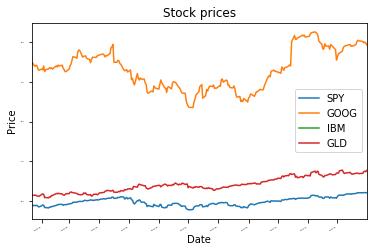

In [28]:
import matplotlib.pyplot as plt
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31')# a year

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    return df
#print df
df=test_run()

def plot_data(df,title='Stock prices'):
    ax=df.plot(title=title,fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
plot_data(df)